In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [21]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [22]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [23]:
Base = automap_base()
# reflect the tables
Base.prepare(engine,reflect =True)
print(Base.classes.keys())

['measurement', 'station']


In [24]:
Measurement = Base.classes.measurement
Station = Base.classes.station

In [25]:
session = Session(engine)

# Exploratory Precipitation Analysis

In [26]:
rc = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
rc


('2017-08-23',)

In [27]:
a_year_ago = (dt.date(2017,8,23) - dt.timedelta(days=365)).strftime('%Y-%m-%d')

results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= a_year_ago).all()

measure_df = pd.DataFrame(results, columns=['date', 'precipitation'])

measure_df = measure_df.sort_values('date')


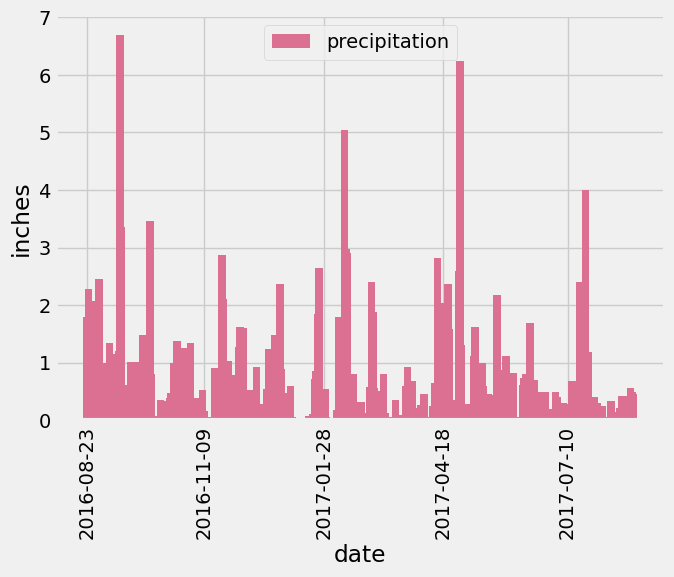

In [28]:
spec_dates = ['2016-08-23','2016-11-09', '2017-01-28','2017-04-18','2017-07-10']

plt.figure(figsize=(7,5))
plt.bar(measure_df['date'], measure_df['precipitation'], width=5, color='palevioletred')
plt.xlabel('date')
plt.ylabel('inches')
plt.xticks(spec_dates, rotation=90)
plt.legend(['precipitation'], loc='upper center')
plt.show()

In [29]:
p_data = measure_df['precipitation'].describe()
sum_stat = pd.DataFrame(p_data)
sum_stat

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [30]:
session.query(func.count(Station.station)).all()

[(9,)]

In [31]:
acs = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

acs

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [32]:
masi = 'USC00519281'

low = session.query(func.min(Measurement.tobs)).filter(Measurement.station == masi).one()[0]
high = session.query(func.max(Measurement.tobs)).filter(Measurement.station == masi).one()[0]
avg = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == masi).one()[0]

print(f"{low}, {high}, {avg}")

54.0, 85.0, 71.66378066378067


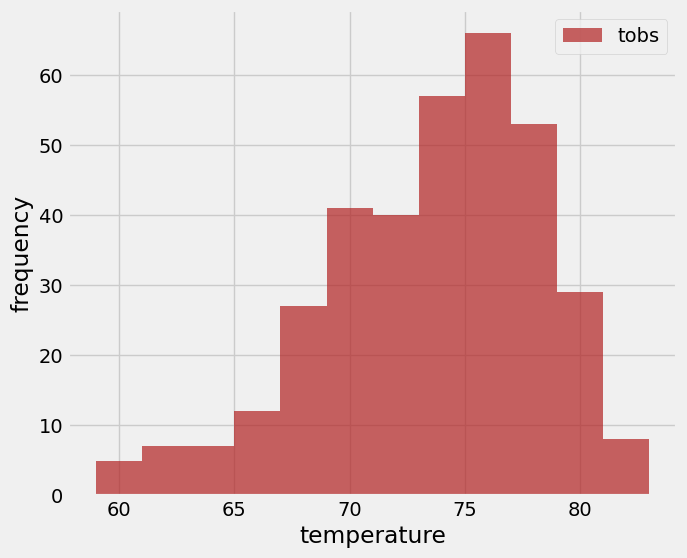

In [33]:
twelve = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.station == masi).\
    filter(Measurement.date >= a_year_ago).all()

new_hist_df = pd.DataFrame(twelve, columns=['date', 'temperature'])

plt.figure(figsize=(7,6))
plt.hist(new_hist_df['temperature'], bins=12, alpha=0.7, color='firebrick')
plt.xlabel('temperature')
plt.ylabel('frequency')
plt.xticks(rotation=360)
plt.legend(['tobs'], loc='upper right')
plt.show()

# Close Session

In [34]:
session.close()